In [1]:
import pandas as pd
import numpy as np

# Pandas display options
pd.set_option('display.float_format', lambda x: '%.2f' % x)

# Set random seed 
RSEED = 88

# Visualizations
import matplotlib.pyplot as plt
%matplotlib inline

plt.style.use('fivethirtyeight')
plt.rcParams['font.size'] = 8

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
palette = sns.color_palette('Paired', 10)
plt.style.use('fivethirtyeight')
plt.rcParams['font.size'] = 8

In [2]:
os.chdir(r'C:\Users\Nikita\Downloads')

In [3]:
data = pd.read_csv('TaxiFare.csv', parse_dates = ['pickup_datetime']).drop(columns = 'key')

In [4]:
data.isnull().sum()

fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

In [4]:
data.shape

(100171, 7)

In [8]:
data.head()

fare_amount           pickup_datetime  pickup_longitude  pickup_latitude  \
0         4.50 2009-06-15 17:26:21+00:00            -73.84            40.72   
1        16.90 2010-01-05 16:52:16+00:00            -74.02            40.71   
2         5.70 2011-08-18 00:35:00+00:00            -73.98            40.76   
3         7.70 2012-04-21 04:30:42+00:00            -73.99            40.73   
4         5.30 2010-03-09 07:51:00+00:00            -73.97            40.77   

   dropoff_longitude  dropoff_latitude  passenger_count  
0             -73.84             40.71                1  
1             -73.98             40.78                1  
2             -73.99             40.75                2  
3             -73.99             40.76                1  
4             -73.96             40.78                1

### Describe the data 

In [7]:
data.describe()

fare_amount  pickup_longitude  pickup_latitude  dropoff_longitude  \
count    100171.00         100171.00        100171.00          100171.00   
mean         11.32            -72.52            39.95             -72.51   
std           9.73             10.67             8.02              11.78   
min          -6.00           -736.33           -74.02             -84.65   
25%           6.00            -73.99            40.73             -73.99   
50%           8.50            -73.98            40.75             -73.98   
75%          12.50            -73.97            40.77             -73.96   
max         325.00            351.05          1669.58            1717.00   

       dropoff_latitude  passenger_count  
count         100171.00        100171.00  
mean              39.97             1.68  
std               10.43             1.30  
min              -74.01             0.00  
25%               40.73             1.00  
50%               40.75             1.00  
75%               40.77             2.00  
max             1989.73             9.00

### Univariate Analysis 

C:\Users\Archit\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


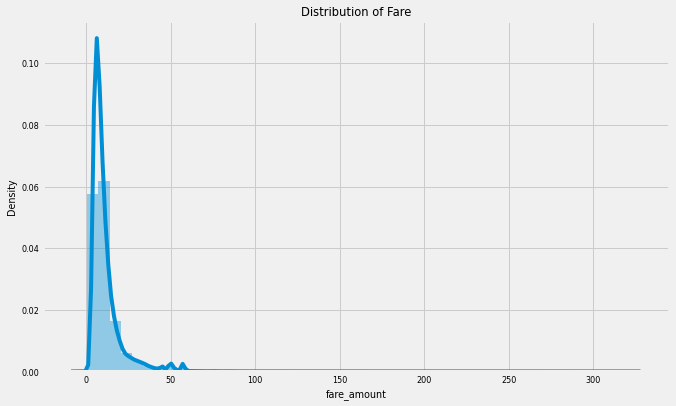

In [9]:
plt.figure(figsize = (10, 6))
sns.distplot(data['fare_amount']);
plt.title('Distribution of Fare');

In [10]:
print(f"there are {len(data[data['fare_amount']<0])} negatives")

there are 8 negatives


In [11]:
print("There are {} rows negative in data set".format(len(data[data["fare_amount"]<0])))

There are 8 rows negative in data set


In [12]:
data.shape

(100171, 7)

In [13]:
50/100000

0.0005

In [14]:
print(f"There are {len(data[data['fare_amount'] < 0])} negative fares.")
print(f"There are {len(data[data['fare_amount'] == 0])} $0 fares.")
print(f"There are {len(data[data['fare_amount'] > 100])} fares greater than $100.")

There are 8 negative fares.
There are 3 $0 fares.
There are 38 fares greater than $100.


In [15]:
data = data[data['fare_amount'].between(left = 2.5, right = 100)]  # outlier Treatments

In [16]:
data.shape

(100119, 7)

In [17]:
df=pd.DataFrame({"x":[10,0,50,28,37,20,18,90,100,678,36,50]})

In [18]:
df["cut"]=pd.cut(df["x"], bins=list(range(0,201,50))).astype(str)

In [19]:
df  # 

x        cut
0    10    (0, 50]
1     0        nan
2    50    (0, 50]
3    28    (0, 50]
4    37    (0, 50]
5    20    (0, 50]
6    18    (0, 50]
7    90  (50, 100]
8   100  (50, 100]
9   678        nan
10   36    (0, 50]
11   50    (0, 50]

In [20]:
# Uppermost bin
df.loc[df['cut'] == 'nan', 'cut'] = '[200+]'

In [21]:
df

x        cut
0    10    (0, 50]
1     0     [200+]
2    50    (0, 50]
3    28    (0, 50]
4    37    (0, 50]
5    20    (0, 50]
6    18    (0, 50]
7    90  (50, 100]
8   100  (50, 100]
9   678     [200+]
10   36    (0, 50]
11   50    (0, 50]

Text(0.5, 1.0, 'Fare Binned')

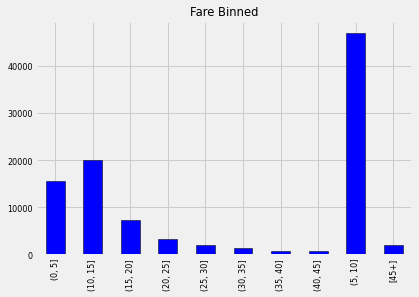

In [22]:
data['fare-bin'] = pd.cut(data['fare_amount'], bins = list(range(0, 50, 5))).astype(str)

# Uppermost bin
data.loc[data['fare-bin'] == 'nan', 'fare-bin'] = '[45+]'

# Adjust bin so the sorting is correct
# data.loc[data['fare-bin'] == '(5, 10]', 'fare-bin'] = '(05, 10]'
# data["fare-bin1"]=np.where(data['fare-bin'] == '(5, 10]','(05, 10]', data['fare-bin'] )

# Bar plot of value counts
data['fare-bin'].value_counts().sort_index().plot.bar(color = 'b', edgecolor = 'k');
plt.title('Fare Binned')

In [23]:
def ecdf(x):
    """Empirical cumulative distribution function of a variable"""
    # Sort in ascending order
    x = np.sort(x)
    n = len(x)
    # Go from 1/n to 1
    y = np.arange(1, n + 1, 1) / n
    return x, y

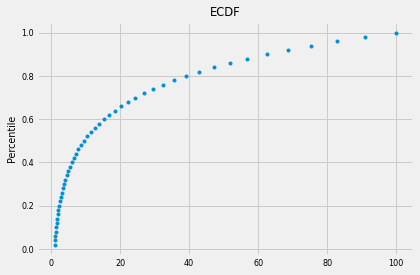

In [24]:
xs, ys = ecdf(np.logspace(0, 2))
plt.plot(xs, ys, '.');
plt.ylabel('Percentile'); 
plt.title('ECDF');

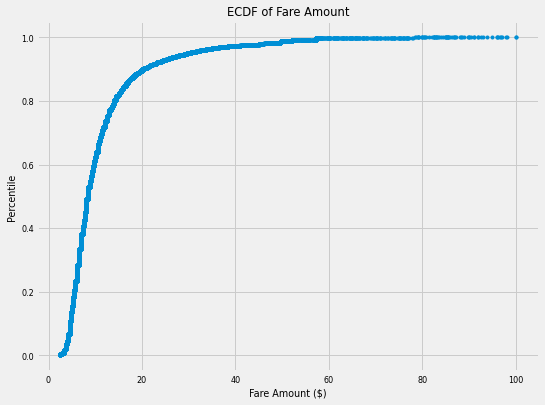

In [25]:
def ecdf(x):
    """Empirical cumulative distribution function of a variable"""
    # Sort in ascending order
    x = np.sort(x)
    n = len(x)
    # Go from 1/n to 1
    y = np.arange(1, n + 1, 1) / n
    return x, y

xs, ys = ecdf(data['fare_amount'])
plt.figure(figsize = (8, 6))
plt.plot(xs, ys, '.')
plt.ylabel('Percentile');
plt.title('ECDF of Fare Amount');
plt.xlabel('Fare Amount ($)');

### Variable : Passenger_count

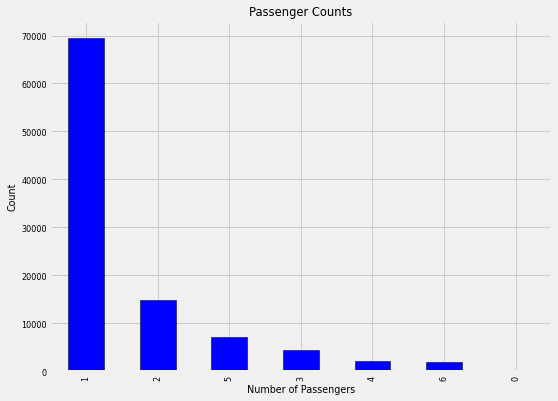

In [26]:
plt.figure(figsize=(8,6))
data['passenger_count'].value_counts().plot.bar(color = 'b', edgecolor = 'k');

plt.title('Passenger Counts'); 
plt.xlabel('Number of Passengers'); 
plt.ylabel('Count');

In [27]:
data["passenger_count"].describe()

count   100119.00
mean         1.68
std          1.30
min          0.00
25%          1.00
50%          1.00
75%          2.00
max          6.00
Name: passenger_count, dtype: float64

In [28]:
data["passenger_count"].value_counts()

1    69503
2    14762
5     7082
3     4384
4     2053
6     2009
0      326
Name: passenger_count, dtype: int64

In [29]:
print(f'Initial Observations: {data.shape[0]}')

Initial Observations: 100119


In [30]:
for col in ['pickup_latitude', 'pickup_longitude', 'dropoff_latitude', 'dropoff_longitude']:
    print(f'{col.capitalize():17}: 2.5% = {round(np.percentile(data[col], 2.5), 2):5} \t 97.5% = {round(np.percentile(data[col], 97.5), 2)}')

Pickup_latitude  : 2.5% = 40.64 	 97.5% = 40.8
Pickup_longitude : 2.5% = -74.01 	 97.5% = -73.78
Dropoff_latitude : 2.5% = 40.64 	 97.5% = 40.81
Dropoff_longitude: 2.5% = -74.01 	 97.5% = -73.78


In [31]:
# Remove latitude and longtiude outliers
data = data.loc[data['pickup_latitude'].between(40, 42)]
data = data.loc[data['pickup_longitude'].between(-75, -72)]
data = data.loc[data['dropoff_latitude'].between(40, 42)]
data = data.loc[data['dropoff_longitude'].between(-75, -72)]
print(f'New number of observations: {data.shape[0]}')

New number of observations: 98046


C:\Users\Archit\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


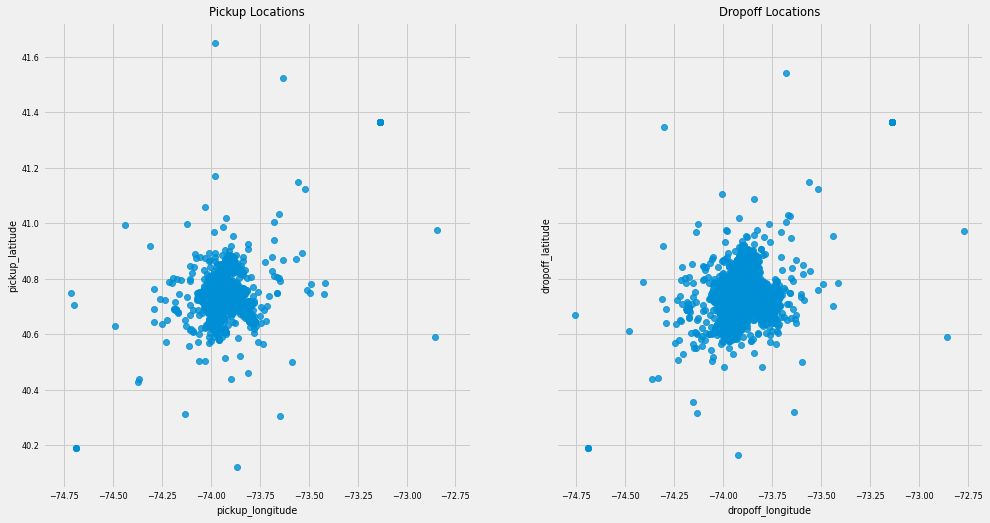

In [32]:
fig, axes = plt.subplots(1, 2, figsize = (15, 8), sharex=True, sharey=True)
axes = axes.flatten()

# Plot Longitude (x) and Latitude (y)
sns.regplot('pickup_longitude', 'pickup_latitude', fit_reg = False, 
            data = data, ax = axes[0]);
sns.regplot('dropoff_longitude', 'dropoff_latitude', fit_reg = False, 
            data = data, ax = axes[1]);
axes[0].set_title('Pickup Locations')
axes[1].set_title('Dropoff Locations');

In [33]:
BB_zoom = (-74.1, -73.7, 40.6, 40.85)
nyc_map_zoom = plt.imread('https://github.com/WillKoehrsen/Machine-Learning-Projects/blob/master/images/nyc_-74.1_-73.7_40.6_40.85.PNG?raw=true')

C:\Users\Archit\AppData\Local\Temp/ipykernel_22168/3585648634.py:2: MatplotlibDeprecationWarning: Directly reading images from URLs is deprecated since 3.4 and will no longer be supported two minor releases later. Please open the URL for reading and pass the result to Pillow, e.g. with ``np.array(PIL.Image.open(urllib.request.urlopen(url)))``.
  nyc_map_zoom = plt.imread('https://github.com/WillKoehrsen/Machine-Learning-Projects/blob/master/images/nyc_-74.1_-73.7_40.6_40.85.PNG?raw=true')


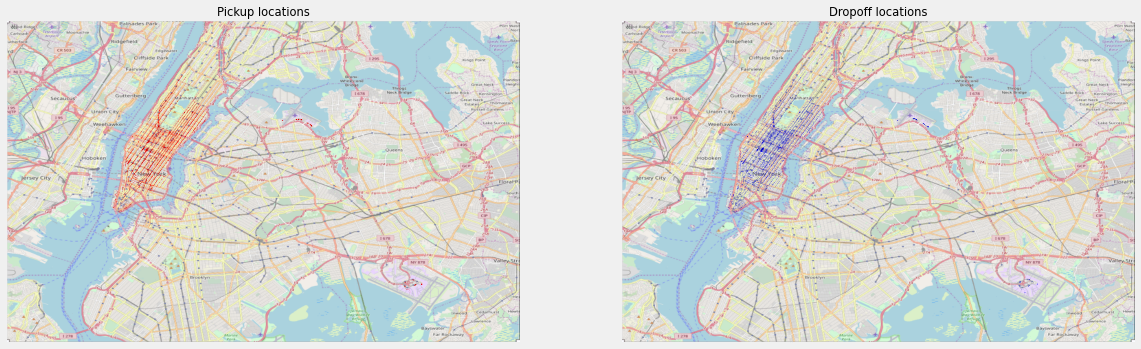

In [34]:
def plot_on_map(df, BB, nyc_map, s=10, alpha=0.2, color = False):
    fig, axs = plt.subplots(1, 2, figsize=(18, 22))
    axs[0].scatter(df.pickup_longitude, df.pickup_latitude, zorder=1, alpha=alpha, c='r', s=s)
    axs[0].set_xlim((BB[0], BB[1]))
    axs[0].set_ylim((BB[2], BB[3]))
    axs[0].set_title('Pickup locations')
    axs[0].axis('off')
    axs[0].imshow(nyc_map, zorder=0, extent=BB)

    axs[1].scatter(df.dropoff_longitude, df.dropoff_latitude, zorder=1, alpha=alpha, c='b', s=s)
    axs[1].set_xlim((BB[0], BB[1]))
    axs[1].set_ylim((BB[2], BB[3]))
    axs[1].set_title('Dropoff locations')
    axs[1].axis('off')
    axs[1].imshow(nyc_map, zorder=0, extent=BB)
    
# plot training data on map zoomed in
plot_on_map(data.sample(47953, random_state = RSEED), 
            BB_zoom, nyc_map_zoom, s=0.05, alpha=0.05)


In [35]:
color_mapping = {fare_bin: palette[i] for i, fare_bin in enumerate(data['fare-bin'].unique())}
color_mapping

{'(0, 5]': (0.6509803921568628, 0.807843137254902, 0.8901960784313725),
 '(15, 20]': (0.12156862745098039, 0.47058823529411764, 0.7058823529411765),
 '(5, 10]': (0.6980392156862745, 0.8745098039215686, 0.5411764705882353),
 '(10, 15]': (0.2, 0.6274509803921569, 0.17254901960784313),
 '(20, 25]': (0.984313725490196, 0.6039215686274509, 0.6),
 '(30, 35]': (0.8901960784313725, 0.10196078431372549, 0.10980392156862745),
 '[45+]': (0.9921568627450981, 0.7490196078431373, 0.43529411764705883),
 '(25, 30]': (1.0, 0.4980392156862745, 0.0),
 '(35, 40]': (0.792156862745098, 0.6980392156862745, 0.8392156862745098),
 '(40, 45]': (0.41568627450980394, 0.23921568627450981, 0.6039215686274509)}

In [36]:
data['color'] = data['fare-bin'].map(color_mapping)
plot_data = data.sample(47953, random_state = RSEED)

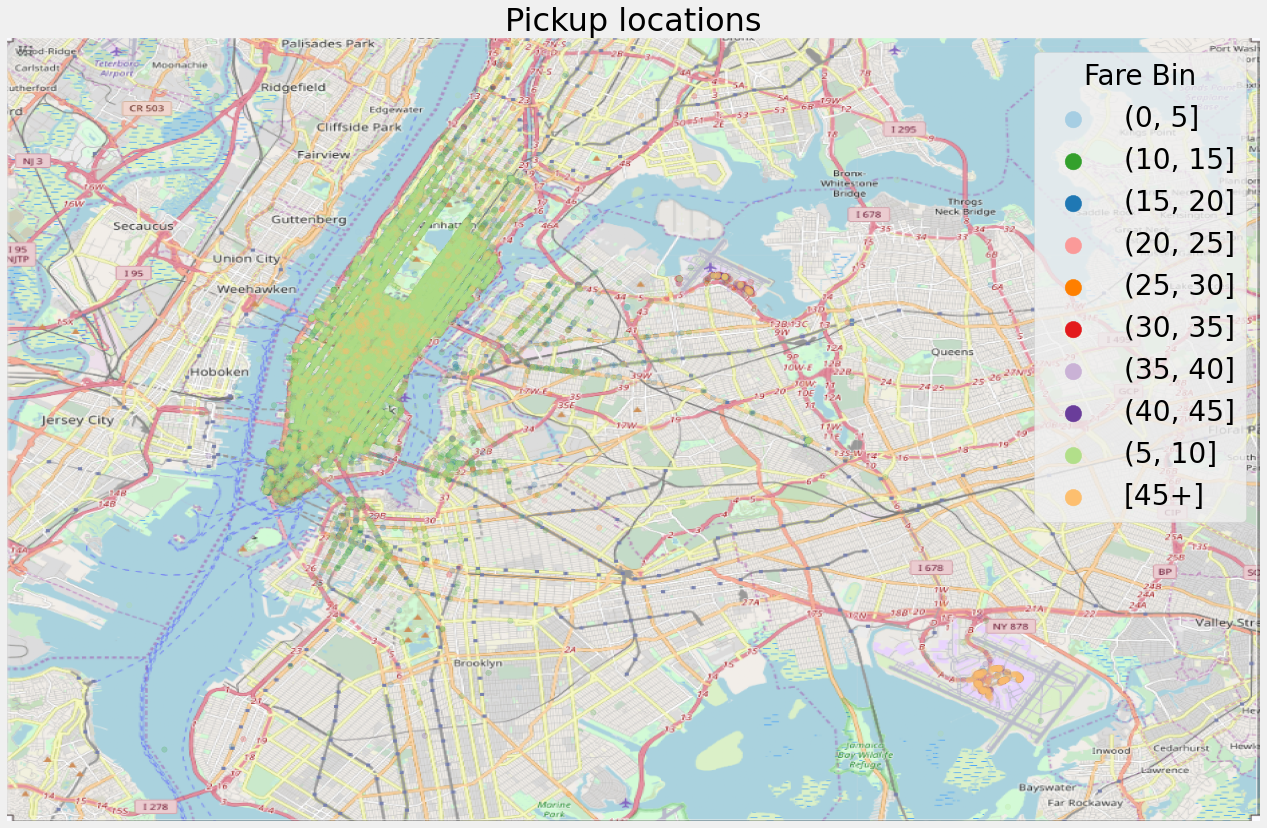

In [37]:
BB = BB_zoom

fig, axs = plt.subplots(1, 1, figsize=(20, 18))

# Plot the pickups
for b, df in plot_data.groupby('fare-bin'):
    # Set the zorder to 1 to plot on top of map
    axs.scatter(df.pickup_longitude, df.pickup_latitude, zorder=1, alpha=0.2, c=df.color, s=30, label = f'{b}')
    axs.set_xlim((BB[0], BB[1]))
    axs.set_ylim((BB[2], BB[3]))
    axs.set_title('Pickup locations', size = 32)
    axs.axis('off')
    
# Legend
leg = axs.legend(fontsize = 28, markerscale = 3)

# Adjust alpha of legend markers
for lh in leg.legendHandles: 
    lh.set_alpha(1)

leg.set_title('Fare Bin', prop = {'size': 28})

# Show map in background (zorder = 0)
axs.imshow(nyc_map_zoom, zorder=0, extent=BB_zoom);


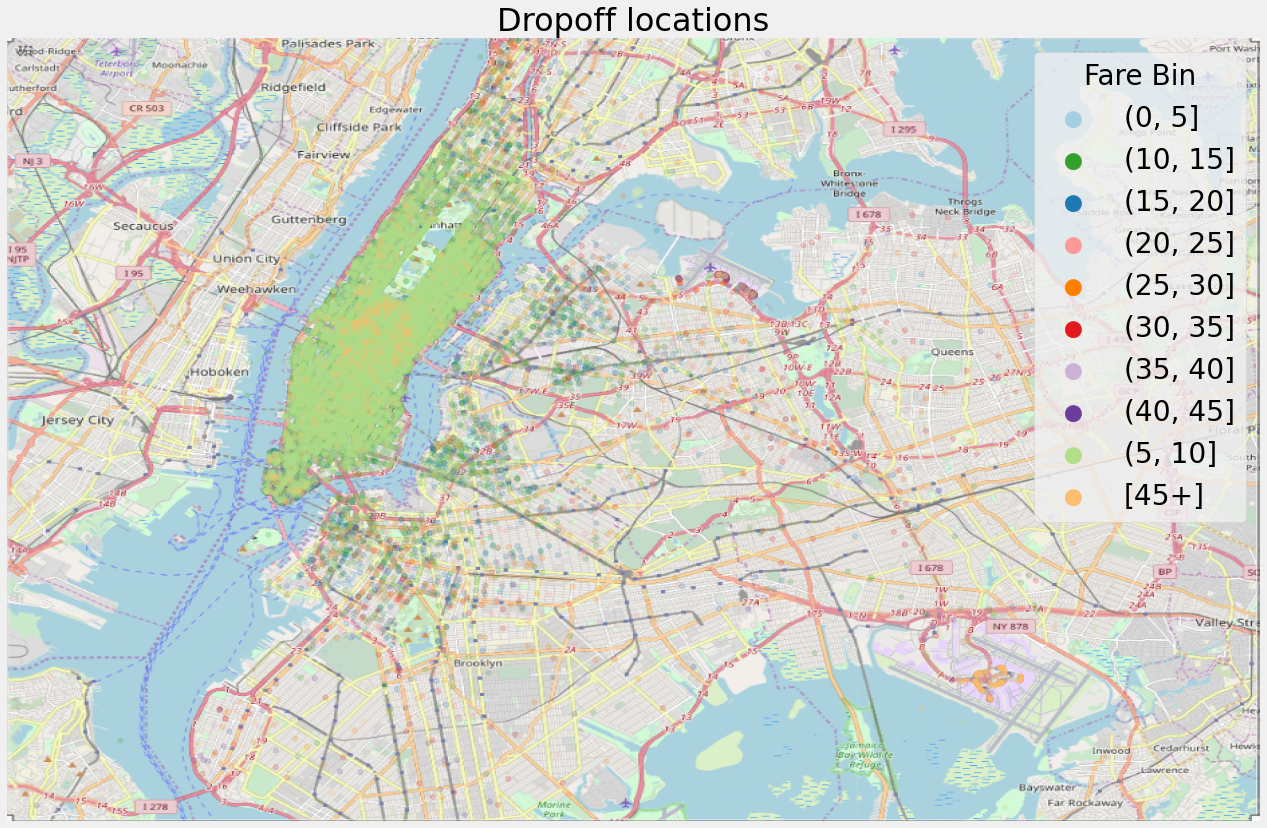

In [38]:
fig, axs = plt.subplots(1, 1, figsize=(20, 18))

# Plot the pickups
for b, df in plot_data.groupby('fare-bin'):
    axs.scatter(df.dropoff_longitude, df.dropoff_latitude, zorder=1, 
                alpha=0.2, c=df.color, s=30, label = f'{b}')
    axs.set_xlim((BB[0], BB[1]))
    axs.set_ylim((BB[2], BB[3]))
    axs.set_title('Dropoff locations', size = 32)
    axs.axis('off')
    
# Legend
leg = axs.legend(fontsize = 28, markerscale = 3)

# Adjust alpha of legend markers
for lh in leg.legendHandles: 
    lh.set_alpha(1)

leg.set_title('Fare Bin', prop = {'size': 28})

# Show map in background (zorder = 0)
axs.imshow(nyc_map_zoom, zorder=0, extent=BB_zoom);


In [39]:
# Absolute difference in latitude and longitude
data['abs_lat_diff'] = (data['dropoff_latitude'] - data['pickup_latitude']).abs()
data['abs_lon_diff'] = (data['dropoff_longitude'] - data['pickup_longitude']).abs()

C:\Users\Archit\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


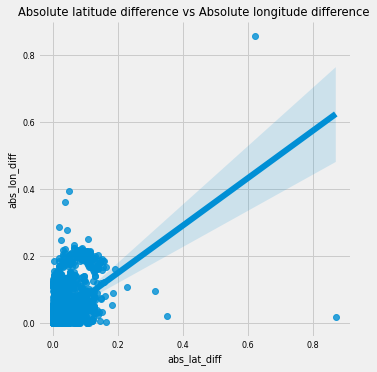

In [40]:
sns.lmplot('abs_lat_diff', 'abs_lon_diff', fit_reg = True,
           data = data.sample(10000, random_state=RSEED));
plt.title('Absolute latitude difference vs Absolute longitude difference');

C:\Users\Archit\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Archit\anaconda3\lib\site-packages\seaborn\regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


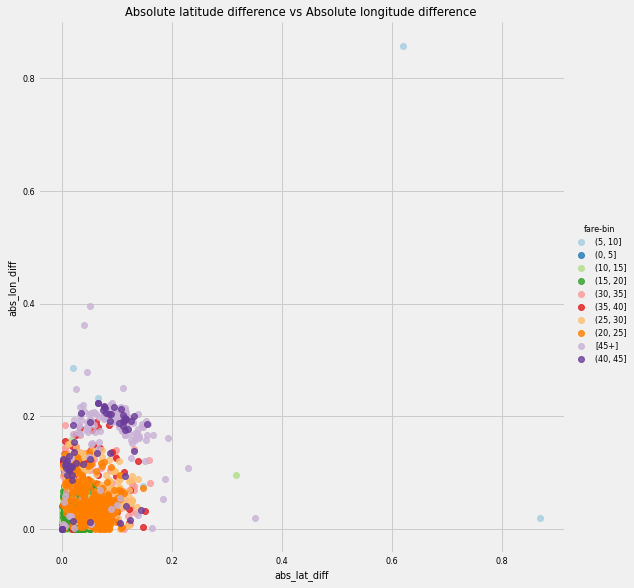

In [41]:
sns.lmplot('abs_lat_diff', 'abs_lon_diff', hue = 'fare-bin', size = 8, palette=palette,
           fit_reg = False, data = data.sample(10000, random_state=RSEED));
plt.title('Absolute latitude difference vs Absolute longitude difference');

C:\Users\Archit\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Archit\anaconda3\lib\site-packages\seaborn\regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


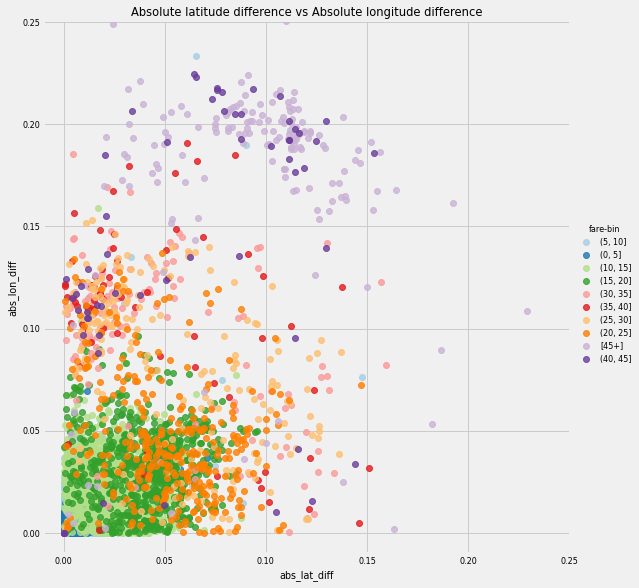

In [42]:
sns.lmplot('abs_lat_diff', 'abs_lon_diff', hue = 'fare-bin', size = 8, palette = palette,
           fit_reg = False, data = data.sample(10000, random_state=RSEED));

plt.xlim((-0.01, .25)); 
plt.ylim((-0.01, .25))
plt.title('Absolute latitude difference vs Absolute longitude difference');

It does seem that the rides with a larger absolute difference in both longitude and latitude tend to cost more. To capture both differences in a single variable, we can add up the two differences in latitude and longitude and also find the square root of the sum of differences squared. The former feature would be called the Manhattan distance - or l1 norm - and the latter is called the Euclidean distance - or l2 norm. Both of these distances are specific examples of the general Minkowski distance.

###### Manhattan and Euclidean Distance
The Minkowski Distance between two points is expressed as:

D(X,Y)=(∑i=1n|xi−yi|p)1/p

if p = 1, then this is the Manhattan distance and if p = 2 this is the Euclidean distance. You may also see these referred to as the l1 or l2 norm where the number indicates p in the equation.

I should point out that these equations are only valid for actual distances in a cartesian coordinate system and here we only use them to find relative distances. To find the actual distances in terms of kilometers, we have to work with the latitude and longitude geographical coordinate system. This will be done later using the Haversine formula.

In [43]:
def minkowski_distance(x1, x2, y1, y2, p):
    return ((abs(x2 - x1) ** p) + (abs(y2 - y1)) ** p) ** (1 / p)

In [44]:
minkowski_distance(0, 3, 0, 4, 1) #Here's an example of the Manhattan Distance which is simply the sum of differences in each dimension.

7.0

In [45]:
minkowski_distance(0, 3, 0, 4, 2) # Euclidean Distance

5.0

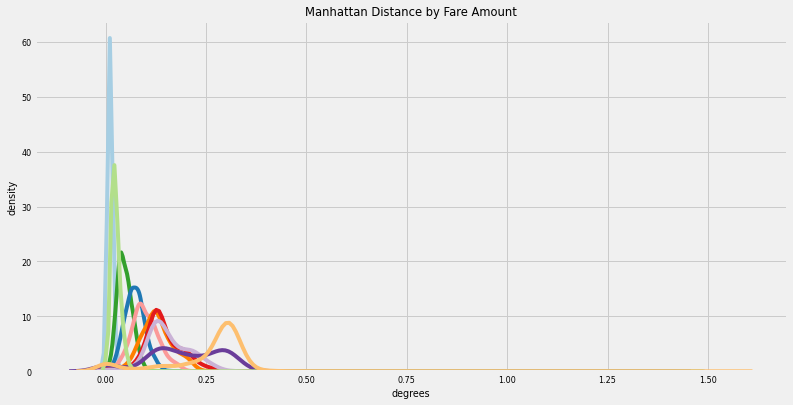

In [47]:
data['manhattan'] = minkowski_distance(data['pickup_longitude'], 
                                       data['dropoff_longitude'],
                                       data['pickup_latitude'],
                                       data['dropoff_latitude'], 1)

# Calculate distribution by each fare bin
plt.figure(figsize = (12, 6))
for f, grouped in data.groupby('fare-bin'):
    sns.kdeplot(grouped['manhattan'], label = f'{f}', color = list(grouped['color'])[0]);

plt.xlabel('degrees'); 
plt.ylabel('density');
plt.title('Manhattan Distance by Fare Amount');

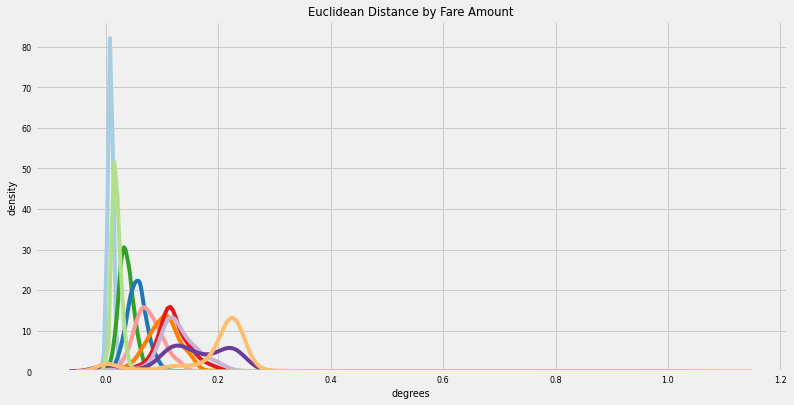

In [48]:
data['euclidean'] = minkowski_distance(data['pickup_longitude'], data['dropoff_longitude'],
                                       data['pickup_latitude'], 
                                       data['dropoff_latitude'], 2)

# Calculate distribution by each fare bin
plt.figure(figsize = (12, 6))
for f, grouped in data.groupby('fare-bin'):
    sns.kdeplot(grouped['euclidean'], label = f'{f}', color = list(grouped['color'])[0]);

plt.xlabel('degrees'); 
plt.ylabel('density')
plt.title('Euclidean Distance by Fare Amount');

In [49]:
data.groupby('fare-bin')['euclidean'].agg(['mean', 'count'])

mean  count
fare-bin             
(0, 5]    0.01  15112
(10, 15]  0.04  19597
(15, 20]  0.05   7208
(20, 25]  0.08   3144
(25, 30]  0.10   1977
(30, 35]  0.12   1450
(35, 40]  0.13    805
(40, 45]  0.16    671
(5, 10]   0.02  46142
[45+]     0.19   1940

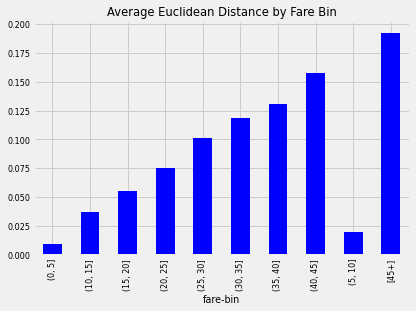

In [50]:
data.groupby('fare-bin')['euclidean'].mean().plot.bar(color = 'b'); # pandas
plt.title('Average Euclidean Distance by Fare Bin');

There is a very clearly relationship between the fare bin and the average distance of the trip! This should give us confidence that this feature will be useful to a model.

Another plot we can make is the passenger count distribution colored by the fare bin.

In [51]:
data = data[data['passenger_count'].between(left = 1, right =6 )]

In [52]:
data.groupby("passenger_count").agg({"fare_amount":["mean", "count", "std", "min", "max"]})

fare_amount                         
                       mean  count   std  min    max
passenger_count                                     
1                     11.12  68026  9.14 2.50 100.00
2                     11.81  14490  9.98 2.50  96.25
3                     11.45   4301  9.14 2.50  93.75
4                     11.49   2015  9.74 2.50  96.70
5                     11.22   6927  9.29 2.50  91.00
6                     12.17   1969 10.00 2.50  75.83

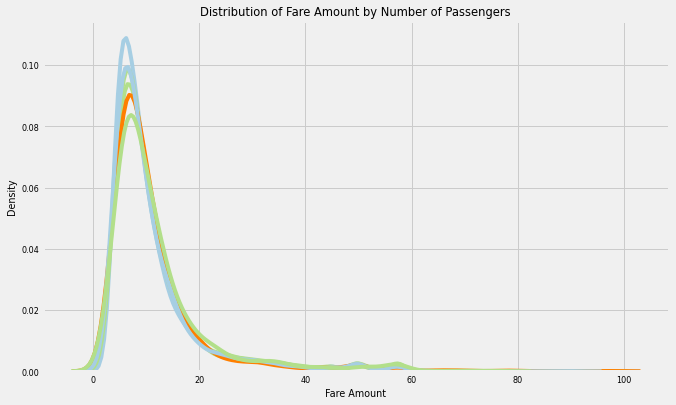

In [53]:
plt.figure(figsize = (10, 6))

for p, grouped in data.groupby('passenger_count'):
    sns.kdeplot(grouped['fare_amount'], label = f'{p} passengers', color = list(grouped['color'])[0]);
    
plt.xlabel('Fare Amount'); 
plt.ylabel('Density')
plt.title('Distribution of Fare Amount by Number of Passengers');

###### There does not appear to be much difference between the number of passengers. To get a more accurate picture, we can calculate the actual stats.

In [54]:
data.columns

Index(['fare_amount', 'pickup_datetime', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count', 'fare-bin',
       'color', 'abs_lat_diff', 'abs_lon_diff', 'manhattan', 'euclidean'],
      dtype='object')

In [55]:
df1=data.groupby("passenger_count").agg({"fare_amount":["mean", "count", "std", "min", "max"],
                                    "abs_lon_diff":["sum",  "std"]})


In [56]:
df1.columns

MultiIndex([( 'fare_amount',  'mean'),
            ( 'fare_amount', 'count'),
            ( 'fare_amount',   'std'),
            ( 'fare_amount',   'min'),
            ( 'fare_amount',   'max'),
            ('abs_lon_diff',   'sum'),
            ('abs_lon_diff',   'std')],
           )

In [57]:
# df1.to_excel("df1.xlsx")
df1.columns

MultiIndex([( 'fare_amount',  'mean'),
            ( 'fare_amount', 'count'),
            ( 'fare_amount',   'std'),
            ( 'fare_amount',   'min'),
            ( 'fare_amount',   'max'),
            ('abs_lon_diff',   'sum'),
            ('abs_lon_diff',   'std')],
           )

In [58]:
# data.groupby("passenger_count").agg({"fare_amount":["mean", "count", "std", "min", "max"]})
data.groupby('passenger_count')['fare_amount', 'abs_lon_diff'].agg(['mean', 'count'])

C:\Users\Archit\AppData\Local\Temp/ipykernel_22168/117642603.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  data.groupby('passenger_count')['fare_amount', 'abs_lon_diff'].agg(['mean', 'count'])


fare_amount        abs_lon_diff       
                       mean  count         mean  count
passenger_count                                       
1                     11.12  68026         0.02  68026
2                     11.81  14490         0.02  14490
3                     11.45   4301         0.02   4301
4                     11.49   2015         0.02   2015
5                     11.22   6927         0.02   6927
6                     12.17   1969         0.02   1969

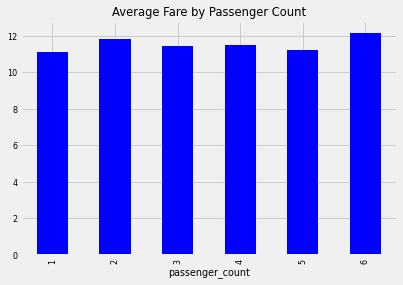

In [59]:
data.groupby('passenger_count')['fare_amount'].mean().plot.bar(color = 'b');
plt.title('Average Fare by Passenger Count');

There is a small but noticeable difference in the average fare by the number of passengers.

### Calculate Distance between points using Haversine distance

To calculate a more realistic distance between the pickup and dropoff, we can use the Haversine distance. This is the Great Circle distance, representing the shortest distance along the surface of the Earth connecting two points taking into account the fact that the Earth is a sphere (or so I'm told). It's not the best measure because the taxis do not travel along lines, but it's more accurate in terms of an absolute distance than the Manhattan and Euclidean distances made from the absolute latitude and longitude difference. The Manhattan and Euclidean distances are relative and do not take into account the spherical shape of the Earth.

(We could convert the latitude and longitude into cartesian coordinates after establishing an origin. One option would be to use the center of the Earth and another would be to use the average of all coordinates in the data as an origin. Then, once we converted the points in this coordinate system, we could use the Manhattan and Euclidean formulas to find distances between points in kilometers. These are all approximations because we can't find the actual street distance.)

The formula for Haversine distance is:

=2rarcsin(sin2(φ2−φ12)+cos(φ1)cos(φ2)sin2(λ2−λ12)−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−√)
 
 where r is the radius of the Earth. The end units will be in km.

In [60]:
R = 6378

def haversine_np(lon1, lat1, lon2, lat2):
    """
    """
    # Convert latitude and longitude to radians
    lon1, lat1, lon2, lat2 = map(np.radians, [lon1, lat1, lon2, lat2])

    # Find the differences
    dlon = lon2 - lon1
    dlat = lat2 - lat1

    # Apply the formula 
    a = np.sin(dlat/2.0)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2.0)**2
    # Calculate the angle (in radians)
    c = 2 * np.arcsin(np.sqrt(a))
    # Convert to kilometers
    km = R * c
    
    return km


In [61]:
R = 6378

def haversine_np(lon1, lat1, lon2, lat2):
    """
    Calculate the great circle distance between two points
    on the earth (specified in decimal degrees)

    All args must be of equal length.    
    
    source: https://stackoverflow.com/a/29546836

    """
    # Convert latitude and longitude to radians
    lon1, lat1, lon2, lat2 = map(np.radians, [lon1, lat1, lon2, lat2])

    # Find the differences
    dlon = lon2 - lon1
    dlat = lat2 - lat1

    # Apply the formula 
    a = np.sin(dlat/2.0)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2.0)**2
    # Calculate the angle (in radians)
    c = 2 * np.arcsin(np.sqrt(a))
    # Convert to kilometers
    km = R * c
    
    return km

In [62]:
data['haversine'] =  haversine_np(data['pickup_longitude'], data['pickup_latitude'],
                         data['dropoff_longitude'], data['dropoff_latitude']) 

C:\Users\Archit\AppData\Local\Temp/ipykernel_22168/555985925.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['haversine'] =  haversine_np(data['pickup_longitude'], data['pickup_latitude'],


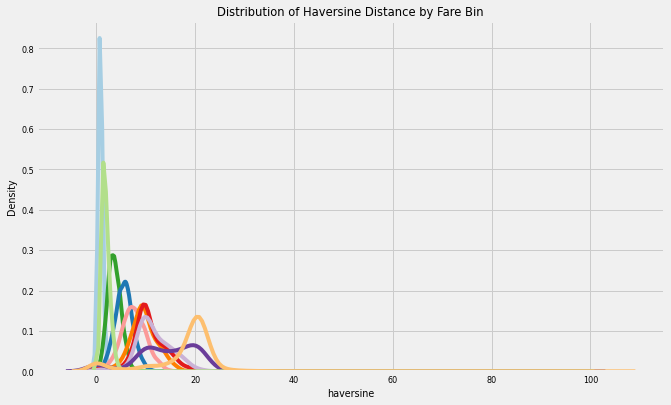

In [63]:

plt.figure(figsize = (10, 6))

for f, grouped in data.groupby('fare-bin'):
    sns.kdeplot(grouped['haversine'], label = f'{f}', color = list(grouped['color'])[0]);
    
plt.title('Distribution of Haversine Distance by Fare Bin');

In [64]:
data.groupby('fare-bin')['haversine'].agg(['mean', 'count'])

mean  count
fare-bin             
(0, 5]    0.93  15046
(10, 15]  3.68  19539
(15, 20]  5.55   7193
(20, 25]  7.52   3135
(25, 30]  9.57   1971
(30, 35] 10.80   1448
(35, 40] 11.82    803
(40, 45] 14.32    670
(5, 10]   1.94  45984
[45+]    17.67   1939

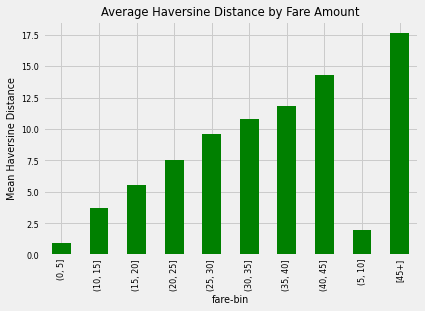

In [65]:
data.groupby('fare-bin')['haversine'].mean().sort_index().plot.bar(color = 'g');
plt.title('Average Haversine Distance by Fare Amount');
plt.ylabel('Mean Haversine Distance');

In [66]:
corrs["fare_amount"].plot.bar(color="b");

NameError: name 'corrs' is not defined

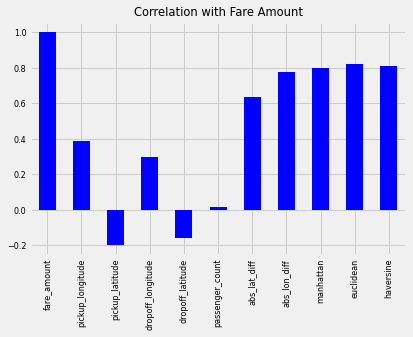

In [67]:
corrs = data.corr()
corrs['fare_amount'].plot.bar(color = 'b');
plt.title('Correlation with Fare Amount');

In [68]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(data, np.array(data['fare_amount']), 
                                                      stratify = data['fare-bin'],
                                                      random_state = RSEED, test_size = 0.3)

In [69]:
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings('ignore', category = RuntimeWarning)

def metrics(train_pred, valid_pred, y_train, y_valid):
    """Calculate metrics:
       Root mean squared error and mean absolute percentage error"""
    
    # Root mean squared error
    train_rmse = np.sqrt(mean_squared_error(y_train, train_pred))
    valid_rmse = np.sqrt(mean_squared_error(y_valid, valid_pred))
    
    # Calculate absolute percentage error
    train_ape = abs((y_train - train_pred) / y_train)
    valid_ape = abs((y_valid - valid_pred) / y_valid)
    
    # Account for y values of 0
    train_ape[train_ape == np.inf] = 0
    train_ape[train_ape == -np.inf] = 0
    valid_ape[valid_ape == np.inf] = 0
    valid_ape[valid_ape == -np.inf] = 0
    
    train_mape = 100 * np.mean(train_ape)
    valid_mape = 100 * np.mean(valid_ape)
    
    return train_rmse, valid_rmse, train_mape, valid_mape


In [70]:
# var=data.columns.to_list()

In [71]:
def evaluate(model, features, X_train, X_valid, y_train, y_valid):
    """Mean absolute percentage error"""
    
    # Make predictions
    train_pred = model.predict(X_train[features])
    valid_pred = model.predict(X_valid[features])
    
    # Get metrics
    train_rmse, valid_rmse, train_mape, valid_mape = metrics(train_pred, valid_pred,
                                                             y_train, y_valid)
    print(f'Training:   rmse = {round(train_rmse, 2)} \t mape = {round(train_mape, 2)}')
    print(f'Validation: rmse = {round(valid_rmse, 2)} \t mape = {round(valid_mape, 2)}')

In [72]:
Features=['haversine', 'abs_lat_diff', 'abs_lon_diff', 'passenger_count']

In [73]:
from sklearn.ensemble import RandomForestRegressor

In [74]:
from sklearn.ensemble import RandomForestRegressor

# Create the random forest
random_forest = RandomForestRegressor(n_estimators = 20, max_depth = 20, 
                                      max_features = None,
                                      bootstrap = True, verbose = 1, n_jobs = -1, criterion="mse")

# Train on data
random_forest.fit(X_train[Features], y_train)

C:\Users\Archit\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    1.0s finished


RandomForestRegressor(criterion='mse', max_depth=20, max_features=None,
                      n_estimators=20, n_jobs=-1, verbose=1)

In [75]:
evaluate(random_forest, Features,
         X_train, X_valid, y_train, y_valid)

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.


Training:   rmse = 2.41 	 mape = 14.54
Validation: rmse = 4.43 	 mape = 23.36


[Parallel(n_jobs=8)]: Done  20 out of  20 | elapsed:    0.1s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  20 out of  20 | elapsed:    0.0s finished


In [76]:
def model_rf(X_train, X_valid, y_train, y_valid, features,
             model = RandomForestRegressor(n_estimators = 50, max_depth = 12,
                                           n_jobs = -1),
             return_model = False):
    """Train and evaluate the random forest using the given set of features."""
    
    # Train
    model.fit(X_train[features], y_train)
    
    # Validation
    evaluate(model, features, X_train, X_valid, y_train, y_valid)
    

    
    # Extract feature importances
    feature_importances = pd.DataFrame({'feature': features,
                                        'importance': model.feature_importances_}).\
                           sort_values('importance', ascending = False).set_index('feature')
    
    if return_model:
        return feature_importances, model
    
    return feature_importances


In [77]:
data.columns

Index(['fare_amount', 'pickup_datetime', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count', 'fare-bin',
       'color', 'abs_lat_diff', 'abs_lon_diff', 'manhattan', 'euclidean',
       'haversine'],
      dtype='object')

In [78]:
fi, model=model_rf(X_train, X_valid, y_train, y_valid,
                   features = ['abs_lat_diff', 'abs_lon_diff', 'haversine', 'passenger_count',
                               'pickup_latitude', 'pickup_longitude', 'dropoff_latitude',
                               'dropoff_longitude','manhattan'], 
              return_model=True)

Training:   rmse = 2.99 	 mape = 19.15
Validation: rmse = 4.03 	 mape = 21.23


In [79]:
fi

importance
feature                      
haversine                0.79
abs_lon_diff             0.10
dropoff_longitude        0.03
abs_lat_diff             0.02
manhattan                0.02
dropoff_latitude         0.02
pickup_longitude         0.01
pickup_latitude          0.01
passenger_count          0.00

In [80]:
model

RandomForestRegressor(max_depth=12, n_estimators=50, n_jobs=-1)

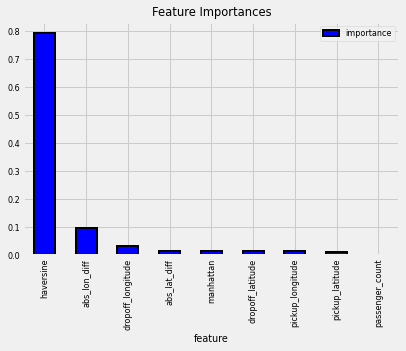

In [81]:
fi.plot.bar(color = 'b', edgecolor = 'k', linewidth = 2);
plt.title('Feature Importances');

#### Additional Feature Engineering

#### Based on time

In [122]:
print("min",data["pickup_datetime"].min())
print("max",data["pickup_datetime"].max())

min 2009-01-01 00:46:56+00:00
max 2015-06-30 23:47:07+00:00


In [124]:
data["pickup_datetime"].dtypes

datetime64[ns, UTC]

In [125]:
import re

def extract_dateinfo(df, date_col, drop=True, time=False, 
                     start_ref = pd.datetime(1900, 1, 1),
                     extra_attr = False):
    """
    Extract Date (and time) Information from a DataFrame
    
    """
    df = df.copy()
    
    # Extract the field
    fld = df[date_col]
    
    # Check the time
    fld_dtype = fld.dtype
    if isinstance(fld_dtype, pd.core.dtypes.dtypes.DatetimeTZDtype):
        fld_dtype = np.datetime64

    # Convert to datetime if not already
    if not np.issubdtype(fld_dtype, np.datetime64):
        df[date_col] = fld = pd.to_datetime(fld, infer_datetime_format=True)
    

    # Prefix for new columns
    pre = re.sub('[Dd]ate', '', date_col)
    pre = re.sub('[Tt]ime', '', pre)
    
    # Basic attributes
    attr = ['Year', 'Month', 'Week', 'Day', 'Dayofweek', 'Dayofyear',
            'Days_in_month', 'is_leap_year']
    
    # Additional attributes
    if extra_attr:
        attr = attr + ['Is_month_end', 'Is_month_start', 'Is_quarter_end', 
                       'Is_quarter_start', 'Is_year_end', 'Is_year_start']
    
    # If time is specified, extract time information
    if time: 
        attr = attr + ['Hour', 'Minute', 'Second']
        
    # Iterate through each attribute
    for n in attr: 
        df[pre + n] = getattr(fld.dt, n.lower())
        
    # Calculate days in year
    df[pre + 'Days_in_year'] = df[pre + 'is_leap_year'] + 365
    
    if time:
        # Add fractional time of day (0 - 1) units of day
        df[pre + 'frac_day'] = ((df[pre + 'Hour']) + (df[pre + 'Minute'] / 60) + (df[pre + 'Second'] / 60 / 60)) / 24
        
        # Add fractional time of week (0 - 1) units of week
        
        df[pre + 'frac_week'] = (df[pre + 'Dayofweek'] + df[pre + 'frac_day']) / 7
    
        # Add fractional time of month (0 - 1) units of month
        df[pre + 'frac_month'] = (df[pre + 'Day'] + (df[pre + 'frac_day'])) / (df[pre + 'Days_in_month'] +  1)
        
        # Add fractional time of year (0 - 1) units of year
        df[pre + 'frac_year'] = (df[pre + 'Dayofyear'] + df[pre + 'frac_day']) / (df[pre + 'Days_in_year'] + 1)
        
    # Add seconds since start of reference
    df[pre + 'Elapsed'] = (fld - start_ref).dt.total_seconds()
    
    if drop: 
        df = df.drop(date_col, axis=1)
        
    return df


In [126]:
print(data['pickup_datetime'].min())

2009-01-01 00:46:56+00:00


In [129]:
data = extract_dateinfo(data, 'pickup_datetime', drop = True, 
                         time = True, start_ref = data['pickup_datetime'].min())
data.describe()

fare_amount  pickup_longitude  pickup_latitude  dropoff_longitude  \
count     97728.00          97728.00         97728.00           97728.00   
mean         11.27            -73.98            40.75             -73.97   
std           9.31              0.04             0.03               0.04   
min           2.50            -74.71            40.12             -74.76   
25%           6.00            -73.99            40.74             -73.99   
50%           8.50            -73.98            40.75             -73.98   
75%          12.50            -73.97            40.77             -73.97   
max         100.00            -72.84            41.65             -72.77   

       dropoff_latitude  passenger_count  abs_lat_diff  abs_lon_diff  \
count          97728.00         97728.00      97728.00      97728.00   
mean              40.75             1.68          0.02          0.02   
std                0.03             1.30          0.02          0.04   
min               40.16             1.00          0.00          0.00   
25%               40.74             1.00          0.01          0.01   
50%               40.75             1.00          0.01          0.01   
75%               40.77             2.00          0.03          0.02   
max               41.54             6.00          0.87          0.87   

       manhattan  euclidean  ...  pickup_Days_in_month  pickup_Hour  \
count   97728.00   97728.00  ...              97728.00     97728.00   
mean        0.04       0.03  ...                 30.43        13.49   
std         0.05       0.04  ...                  0.83         6.51   
min         0.00       0.00  ...                 28.00         0.00   
25%         0.02       0.01  ...                 30.00         9.00   
50%         0.03       0.02  ...                 31.00        14.00   
75%         0.05       0.04  ...                 31.00        19.00   
max         1.54       1.10  ...                 31.00        23.00   

       pickup_Minute  pickup_Second  pickup_Days_in_year  pickup_frac_day  \
count       97728.00       97728.00             97728.00         97728.00   
mean           29.50          15.83               365.16             0.58   
std            17.30          19.42                 0.37             0.27   
min             0.00           0.00               365.00             0.00   
25%            14.00           0.00               365.00             0.39   
50%            29.00           4.00               365.00             0.61   
75%            45.00          32.00               365.00             0.81   
max            59.00          59.00               366.00             1.00   

       pickup_frac_week  pickup_frac_month  pickup_frac_year  pickup_Elapsed  
count          97728.00           97728.00          97728.00        97728.00  
mean               0.52               0.52              0.48    101675105.98  
std                0.28               0.28              0.29     58519113.32  
min                0.00               0.03              0.00            0.00  
25%                0.27               0.28              0.23     50979604.00  
50%                0.53               0.52              0.46    101898116.50  
75%                0.75               0.75              0.73    151800257.75  
max                1.00               1.00              1.00    204937211.00  

[8 rows x 27 columns]

In [130]:
data.shape   # Hoversine , re package..

(97728, 30)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


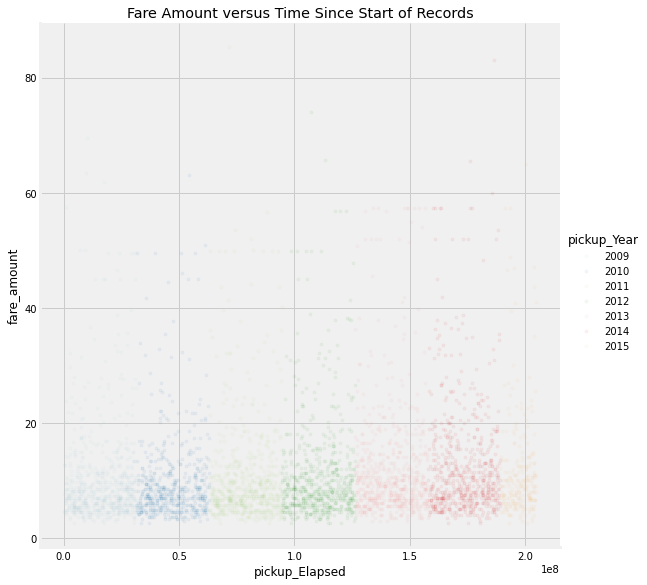

In [131]:
sns.lmplot('pickup_Elapsed', 'fare_amount', hue = 'pickup_Year', palette=palette, size = 8,
           scatter_kws= {'alpha': 0.05}, markers = '.', fit_reg = False,
           data = data.sample(4000, random_state=RSEED));
plt.title('Fare Amount versus Time Since Start of Records');

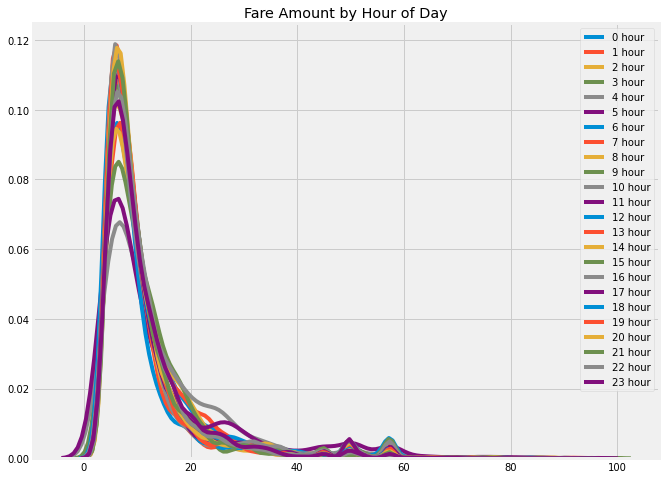

In [132]:
plt.figure(figsize = (10, 8))
for h, grouped in data.groupby('pickup_Hour'):
    sns.kdeplot(grouped['fare_amount'], label = f'{h} hour');
plt.title('Fare Amount by Hour of Day');

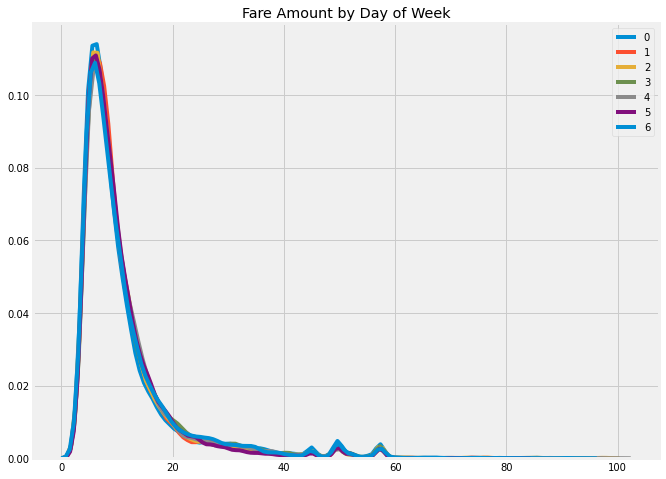

In [133]:
plt.figure(figsize = (10, 8))
for d, grouped in data.groupby('pickup_Dayofweek'):
    sns.kdeplot(grouped['fare_amount'], label = f'{d}')
plt.title('Fare Amount by Day of Week');

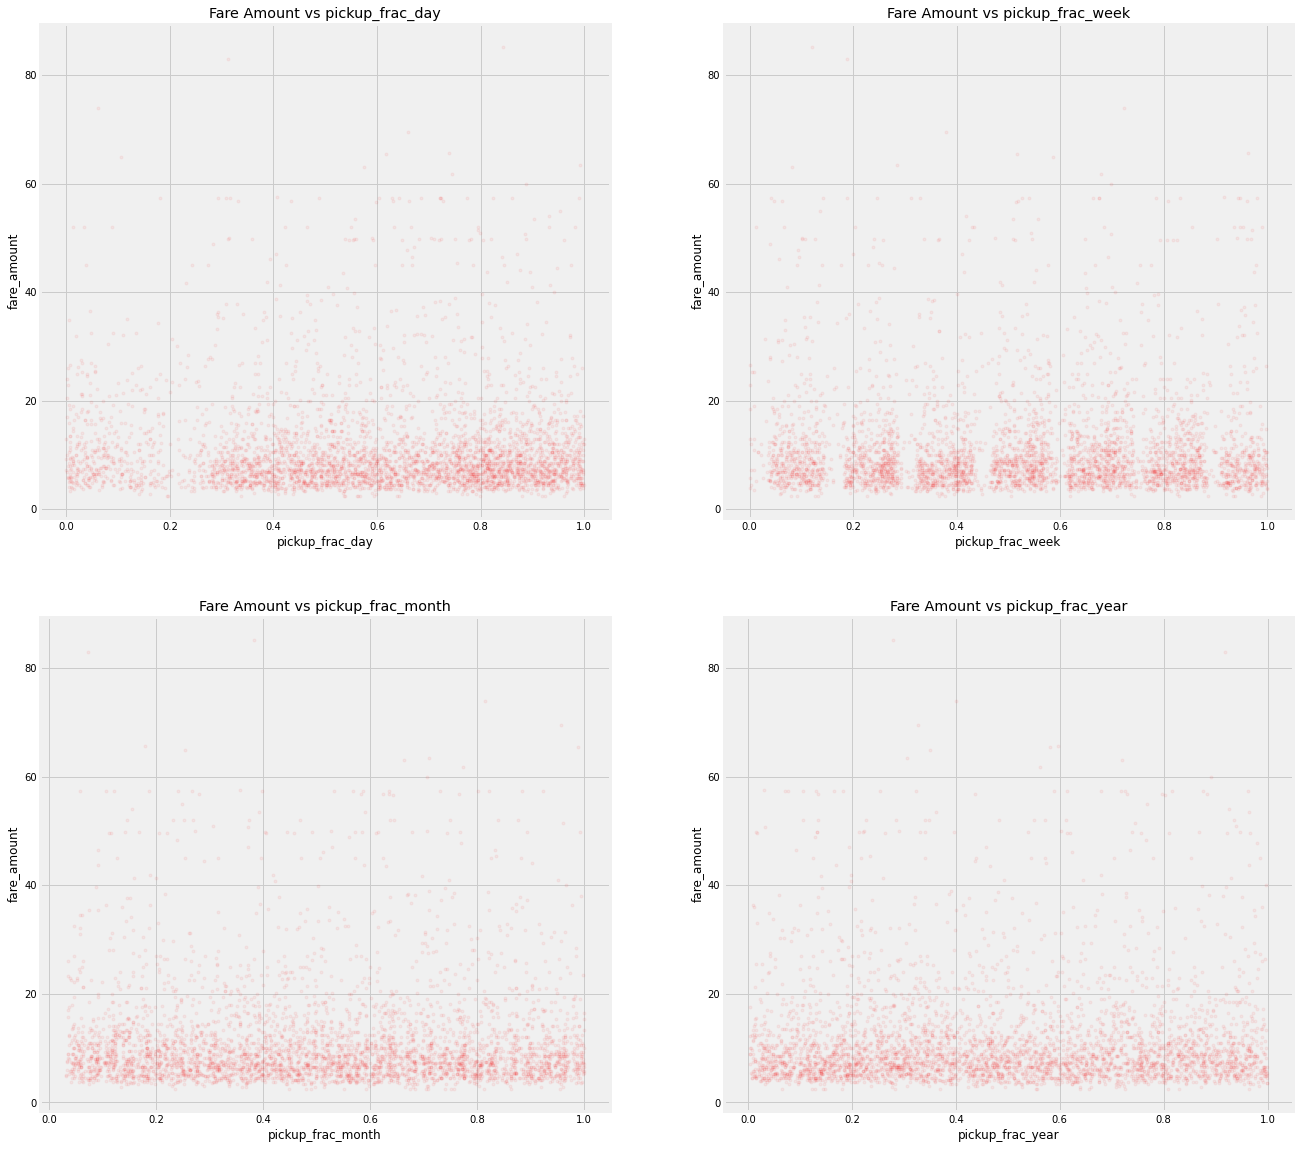

In [135]:
fig, axes = plt.subplots(2, 2, figsize = (20, 20))
axes = axes.flatten()

# Plot each of the fractional times
for i, d in enumerate(['day', 'week', 'month', 'year']):
    ax = axes[i]
    sns.regplot(f'pickup_frac_{d}', 'fare_amount', 
                data = data.sample(4000, random_state = RSEED), 
                fit_reg = False, scatter_kws = {'alpha': 0.05}, marker = '.', ax = ax,
                color = 'r')
    
    ax.set_title(f'Fare Amount vs pickup_frac_{d}')

In [136]:
fare_counts = data.groupby('fare_amount')['haversine'].agg(['count', pd.Series.nunique]).sort_values('count', ascending = False)
fare_counts.head()

count  nunique
fare_amount                
6.50          4852  4801.00
4.50          4055  3995.00
8.50          3730  3703.00
5.30          2860  2815.00
5.70          2784  2753.00

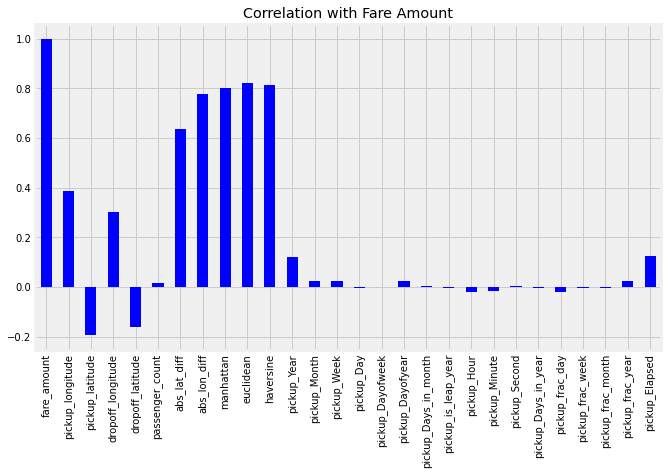

In [137]:
corrs = data.corr()
corrs['fare_amount'].plot.bar(color = 'b', figsize = (10, 6));
plt.title('Correlation with Fare Amount');

In [138]:
df2=data.corr()
df2.to_csv("corr.csv")

In [139]:
X_train, X_valid, y_train, y_valid = train_test_split(data, np.array(data['fare_amount']), 
                                                      stratify = data['fare-bin'],
                                                      random_state = RSEED, test_size = 0.3)

In [146]:
features1 = ['abs_lat_diff', 'abs_lon_diff', 'haversine', 'passenger_count',
            'pickup_latitude', 'pickup_longitude', 
            'dropoff_latitude', 'dropoff_longitude',
            'pickup_frac_day', 'pickup_frac_week', 'pickup_frac_year', 
            'pickup_Elapsed']

In [150]:
len(features1)

12

In [147]:
fi = model_rf(X_train, X_valid, y_train, y_valid,
                   features = features1)

Training:   rmse = 2.63 	 mape = 16.84
Validation: rmse = 3.76 	 mape = 19.27


In [149]:
fi.to_csv("feat1.csv")

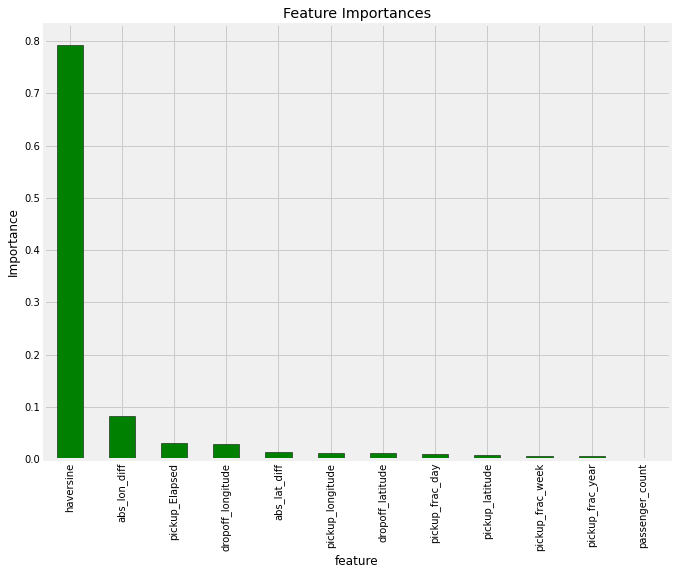

In [142]:
plt.figure(figsize = (10, 8))
fi['importance'].plot.bar(color = 'g', edgecolor = 'k');
plt.ylabel('Importance'); plt.title('Feature Importances');

In [151]:
fi, random_forest = model_rf(X_train, X_valid, y_train, y_valid,
                                  features = features1, return_model = True)

Training:   rmse = 2.64 	 mape = 16.87
Validation: rmse = 3.77 	 mape = 19.19


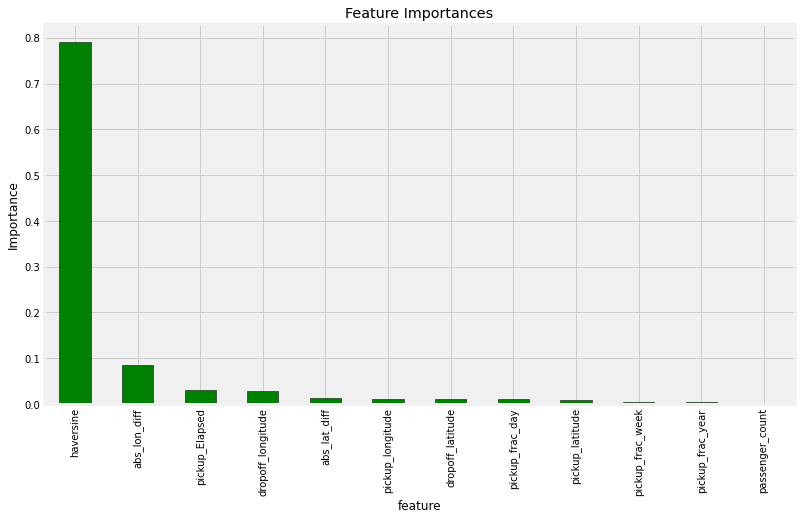

In [152]:
plt.figure(figsize = (12, 7))
fi['importance'].plot.bar(color = 'g', edgecolor = 'k');
plt.ylabel('Importance'); plt.title('Feature Importances');

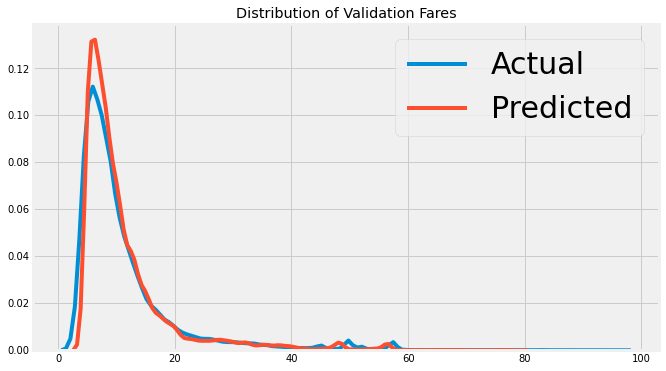

In [153]:
valid_preds = random_forest.predict(X_valid[features1])

plt.figure(figsize = (10, 6))
sns.kdeplot(y_valid, label = 'Actual')
sns.kdeplot(valid_preds, label = 'Predicted')
plt.legend(prop = {'size': 30})
plt.title("Distribution of Validation Fares");

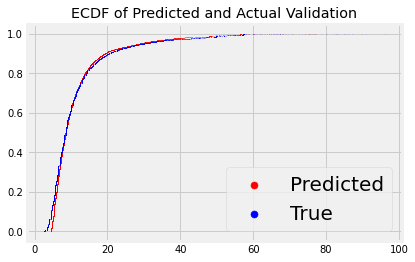

In [154]:
# Generate ecdf data
xv, yv = ecdf(valid_preds)
xtrue, ytrue = ecdf(y_valid)

# Plot the ecdfs on same plot
plt.scatter(xv, yv, s = 0.02,  c = 'r', marker = '.', label = 'Predicted')
plt.scatter(xtrue, ytrue, s = 0.02, c = 'b', marker = '.', label = 'True')
plt.title('ECDF of Predicted and Actual Validation')

plt.legend(markerscale = 100, prop = {'size': 20});

In [97]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

# Hyperparameter grid
param_grid = {
    'n_estimators': np.linspace(10, 100).astype(int),
    'max_depth': [None] + list(np.linspace(5, 30).astype(int)),
    'max_features': ['auto', 'sqrt', None] + list(np.arange(0.5, 1, 0.1)),
    'max_leaf_nodes': [None] + list(np.linspace(10, 50, 500).astype(int)),
    'min_samples_split': [2, 5, 10],
    'bootstrap': [True, False]
}

# Estimator for use in random search
estimator = RandomForestRegressor(random_state = RSEED)

# Create the random search model
rs = GridSearchCV(estimator, param_grid, n_jobs = -1, 
                         cv = 10,
                  verbose = 3)


In [ ]:
X_train, X_valid, y_train, y_valid = train_test_split(data, np.array(data['fare_amount']), 
                                                      stratify = data['fare-bin'],
                                                      random_state = RSEED, test_size = 0.3)

# Select features
time_features = ['pickup_frac_day', 'pickup_frac_week', 'pickup_frac_year', 'pickup_Elapsed']

features = ['abs_lat_diff', 'abs_lon_diff', 'haversine', 'passenger_count',
            'pickup_latitude', 'pickup_longitude', 
            'dropoff_latitude', 'dropoff_longitude'] + time_features

rs.fit(X_train[features], y_train)

In [ ]:
model = rs.best_estimator_
print(f'The best parameters were {rs.best_params_} with a negative mae of {rs.best_score_}')

In [ ]:
model.n_jobs = -1
model.fit(X_train[features], y_train)

evaluate(model, features, X_train, X_valid, y_train, y_valid)

In [ ]:
Decile, R^2, Adj R^2, MAPE, mae, MSE, RMSE